In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

### Research Questions

* What is the organization with the hightest profits over the two years
* Which locations have the highest profit
* What is the relationship between the 

## Data Cleaning

#### Re-formatting the Dataset Headers to all lower_case

In [3]:
new_columns = [row.lower().rstrip().replace(' ', '_') for row in list(data.columns)]

In [4]:
data.columns = new_columns

In [5]:
data.columns

Index(['smes', 'location', 'activity', 'turnover_2018_(pounds_in_millions)',
       'turnover_2019_(pounds_in_millions)',
       'pre-tax_profit_2018_(pounds_in_millions)',
       'pre-tax_profit_2019_(pounds_in_millions)',
       'tax_2018_(pounds_in_millions)', 'tax_2019_(pounds_in_millions)',
       'no_of_employee_2018', 'no_of_employee_2019', 'unnamed:_11',
       'unnamed:_12', 'unnamed:_13', 'unnamed:_14', 'unnamed:_15',
       'unnamed:_16'],
      dtype='object')

### Checking for Missing Values

In [6]:
data.isnull().sum()

smes                                          2
location                                      2
activity                                      2
turnover_2018_(pounds_in_millions)            2
turnover_2019_(pounds_in_millions)            2
pre-tax_profit_2018_(pounds_in_millions)      2
pre-tax_profit_2019_(pounds_in_millions)      2
tax_2018_(pounds_in_millions)                 2
tax_2019_(pounds_in_millions)                 2
no_of_employee_2018                           2
no_of_employee_2019                           2
unnamed:_11                                 200
unnamed:_12                                 200
unnamed:_13                                 200
unnamed:_14                                 200
unnamed:_15                                 200
unnamed:_16                                 200
dtype: int64

### Dropping the missing values

In [7]:
## Dropping the missing values by column and a threshold of 3.

data.dropna(axis=1, thresh=1, inplace=True)

### Dropping additional missing values by rows using a threshold of zero

In [8]:
data.dropna(axis=0, thresh=1, inplace=True)

In [9]:
data['activity'] = data['activity'].str.lower().str.replace(' ','_').str.strip()

In [10]:
data.isnull().sum()

smes                                        0
location                                    0
activity                                    0
turnover_2018_(pounds_in_millions)          0
turnover_2019_(pounds_in_millions)          0
pre-tax_profit_2018_(pounds_in_millions)    0
pre-tax_profit_2019_(pounds_in_millions)    0
tax_2018_(pounds_in_millions)               0
tax_2019_(pounds_in_millions)               0
no_of_employee_2018                         0
no_of_employee_2019                         0
dtype: int64

In [11]:
data.head(5)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019
0,HERITAGE (NORTH WALES),Bangor,property_development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0
1,ITEC TRAINING SOLUTIONS,Cardiff,training_provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0
2,CARPENTER & PATERSON,Welshpool,pipe_supports,12.4,16.12,1.2,1.3,0.16,0.21,44.0,44.0
3,MARLIN INDUSTRIES,Wrexham,timber_based_packaging_for_cables,12.6,16.38,0.9,2.0,0.12,0.32,43.0,43.0
4,GROUNDHOG,Neath,secure_containers,9.1,11.83,2.1,3.0,0.27,0.48,34.0,34.0


In [12]:
data['profits_for_2018'] = data['pre-tax_profit_2018_(pounds_in_millions)'] - data['tax_2018_(pounds_in_millions)']
data.head(2)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018
0,HERITAGE (NORTH WALES),Bangor,property_development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0,5.31
1,ITEC TRAINING SOLUTIONS,Cardiff,training_provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0,1.74


In [13]:
data['profits_for_2019'] = data['pre-tax_profit_2019_(pounds_in_millions)'] - data['tax_2019_(pounds_in_millions)']
data.head(2)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019
0,HERITAGE (NORTH WALES),Bangor,property_development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0,5.31,5.88
1,ITEC TRAINING SOLUTIONS,Cardiff,training_provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0,1.74,1.85


In [14]:
data['profts_for_two_years'] = data['profits_for_2018'] + data['profits_for_2019']

In [15]:
data.head(4)

,smes,location,activity,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019,profts_for_two_years
0,HERITAGE (NORTH WALES),Bangor,property_development,14.3,18.59,6.1,7.0,0.79,1.12,50.0,50.0,5.31,5.88,11.19
1,ITEC TRAINING SOLUTIONS,Cardiff,training_provider,12.7,16.51,2.0,2.2,0.26,0.35,23.0,23.0,1.74,1.85,3.59
2,CARPENTER & PATERSON,Welshpool,pipe_supports,12.4,16.12,1.2,1.3,0.16,0.21,44.0,44.0,1.04,1.09,2.13
3,MARLIN INDUSTRIES,Wrexham,timber_based_packaging_for_cables,12.6,16.38,0.9,2.0,0.12,0.32,43.0,43.0,0.78,1.68,2.46


In [16]:
data['activity'] = data['activity'].str.lower().str.replace(' ','_')

### SMEs with the highest profit over the two years

In [17]:
top_smes = data.groupby('smes')['profts_for_two_years'].sum().sort_values(ascending=False).head(5)

In [18]:
top_smes = top_smes.reset_index(None)

In [19]:
top_smes

,smes,profts_for_two_years
0,Datagraphic,45863.64
1,Tours Abroad Group,35302.44
2,Galaxy Insulation And DRY Lining,32900.13
3,Utopia,31600.35
4,HRE Newco,31307.43


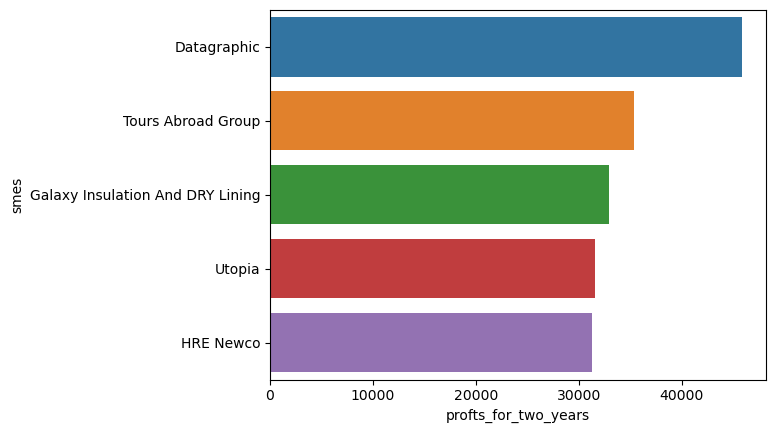

In [20]:
sns.barplot(y=top_smes['smes'], x=top_smes['profts_for_two_years'])
plt.show()

#### Locations with the Highest Profit

In [21]:
top_locations_by_profit = data.groupby('location')['profts_for_two_years'].sum().sort_values(ascending=False).head(5)

In [22]:
top_locations_by_profit = top_locations_by_profit.reset_index()

In [23]:
top_locations_by_profit

,location,profts_for_two_years
0,Sheffield,447497.91
1,Doncaster,320135.34
2,Rotherham,270436.20
3,Barnsley,267890.88
4,Chesterfield,203536.11


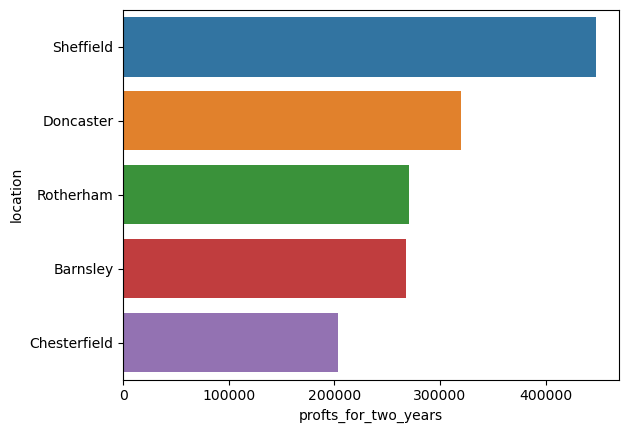

In [24]:
sns.barplot(y=top_locations_by_profit['location'], x=top_locations_by_profit['profts_for_two_years'])
plt.show()

### Descriptive Statistics of the dataset

In [25]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
turnover_2018_(pounds_in_millions),198.0,9532.420707,11567.415059,7.20,12.0000,130.700,17654.0000,53539.00
turnover_2019_(pounds_in_millions),198.0,12392.146919,15037.639577,9.36,15.6000,169.910,22950.2000,69600.70
pre-tax_profit_2018_(pounds_in_millions),198.0,928.043434,1142.363247,0.30,1.0000,13.450,1642.2500,5076.00
pre-tax_profit_2019_(pounds_in_millions),198.0,9594.794444,11562.666440,0.20,1.6000,24.700,17654.0000,53539.00
tax_2018_(pounds_in_millions),198.0,120.645808,148.507090,0.04,0.1300,1.745,213.4925,659.88
tax_2019_(pounds_in_millions),198.0,1535.167222,1850.026538,0.03,0.2600,3.955,2824.6400,8566.24
no_of_employee_2018,198.0,68.156566,57.499245,4.00,31.2500,50.500,83.7500,334.00
no_of_employee_2019,198.0,68.156566,57.499245,4.00,31.2500,50.500,83.7500,334.00
profits_for_2018,198.0,807.397626,993.856157,0.26,0.8700,11.705,1428.7575,4416.12
profits_for_2019,198.0,8059.627222,9712.639902,0.17,1.3400,20.745,14829.3600,44972.76


#### Relationship between the number of employees and profit (2018)

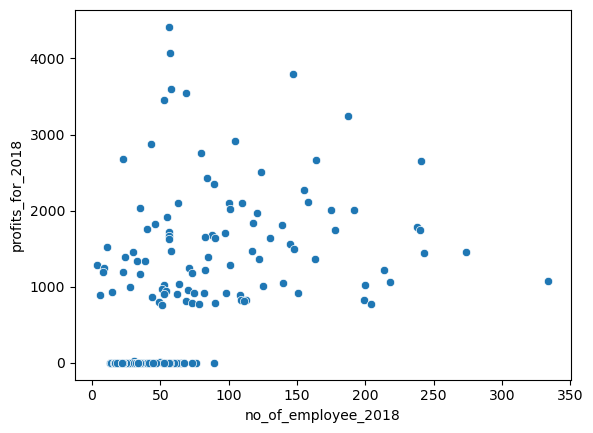

In [26]:
sns.scatterplot(x="no_of_employee_2018", y="profits_for_2018", data=data)
plt.show()

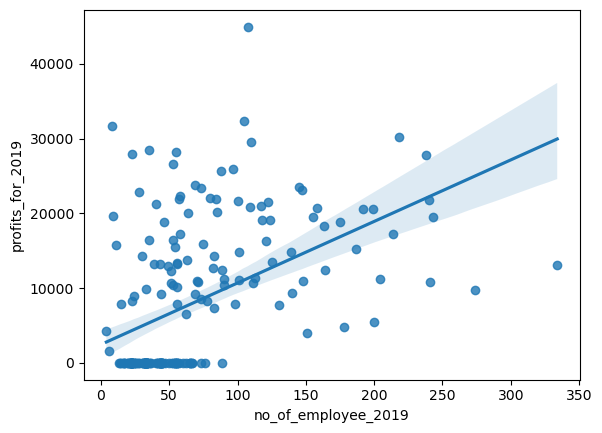

In [27]:
sns.regplot(x="no_of_employee_2019", y="profits_for_2019", data=data)
plt.show()

In [28]:
data.corr().transpose()

,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019,profts_for_two_years
turnover_2018_(pounds_in_millions),1.000000,1.000000,0.757419,0.996555,0.757419,0.996555,0.488899,0.488899,0.757419,0.996555,0.994851
turnover_2019_(pounds_in_millions),1.000000,1.000000,0.757419,0.996555,0.757419,0.996555,0.488899,0.488899,0.757419,0.996555,0.994851
pre-tax_profit_2018_(pounds_in_millions),0.757419,0.757419,1.000000,0.757891,1.000000,0.757891,0.465186,0.465186,1.000000,0.757891,0.796779
pre-tax_profit_2019_(pounds_in_millions),0.996555,0.996555,0.757891,1.000000,0.757891,1.000000,0.487620,0.487620,0.757891,1.000000,0.998087
tax_2018_(pounds_in_millions),0.757419,0.757419,1.000000,0.757891,1.000000,0.757891,0.465186,0.465186,1.000000,0.757891,0.796779
tax_2019_(pounds_in_millions),0.996555,0.996555,0.757891,1.000000,0.757891,1.000000,0.487620,0.487620,0.757891,1.000000,0.998087
no_of_employee_2018,0.488899,0.488899,0.465186,0.487620,0.465186,0.487620,1.000000,1.000000,0.465186,0.487620,0.495750
no_of_employee_2019,0.488899,0.488899,0.465186,0.487620,0.465186,0.487620,1.000000,1.000000,0.465186,0.487620,0.495750
profits_for_2018,0.757419,0.757419,1.000000,0.757891,1.000000,0.757891,0.465186,0.465186,1.000000,0.757891,0.796779
profits_for_2019,0.996555,0.996555,0.757891,1.000000,0.757891,1.000000,0.487620,0.487620,0.757891,1.000000,0.998087


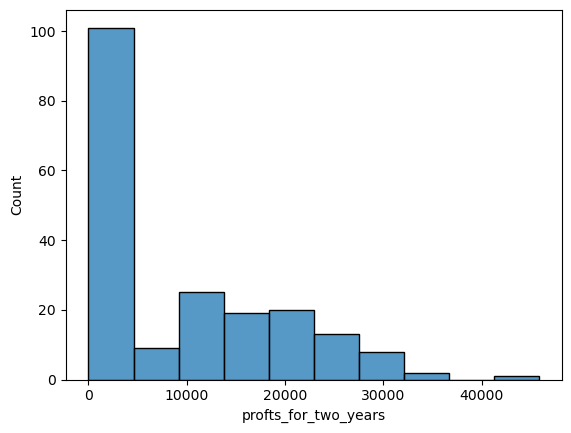

In [29]:
sns.histplot(data.profts_for_two_years, bins=10)
plt.show()

# Data Pre-processing

In [34]:
X = data.drop(['smes','location','activity','profts_for_two_years'], axis=1)

In [36]:
y = data['profts_for_two_years']

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, random_state=101)

In [40]:
X_train

,turnover_2018_(pounds_in_millions),turnover_2019_(pounds_in_millions),pre-tax_profit_2018_(pounds_in_millions),pre-tax_profit_2019_(pounds_in_millions),tax_2018_(pounds_in_millions),tax_2019_(pounds_in_millions),no_of_employee_2018,no_of_employee_2019,profits_for_2018,profits_for_2019
108,15734.0,20454.20,3310.0,15734.0,430.30,2517.44,43.0,43.0,2879.70,13216.56
22,13.9,18.07,1.0,1.3,0.13,0.21,31.0,31.0,0.87,1.09
39,9.6,12.48,0.6,1.2,0.08,0.19,32.0,32.0,0.52,1.01
32,11.2,14.56,1.5,1.6,0.20,0.26,43.0,43.0,1.30,1.34
148,17079.0,22202.70,1671.0,17079.0,217.23,2732.64,30.0,30.0,1453.77,14346.36
...,...,...,...,...,...,...,...,...,...,...
63,12.5,16.25,0.8,1.6,0.10,0.26,32.0,32.0,0.70,1.34
70,14.8,19.24,1.3,2.6,0.17,0.42,43.0,43.0,1.13,2.18
81,13.8,17.94,1.1,2.2,0.14,0.35,52.0,52.0,0.96,1.85
11,14.7,19.11,1.2,2.0,0.16,0.32,27.0,27.0,1.04,1.68


In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
model = LinearRegression()

In [46]:
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.predict(X_test)

array([8.563080e+03, 1.201482e+04, 2.391549e+04, 1.115835e+04,
       2.960535e+04, 3.570000e+00, 1.779396e+04, 1.117191e+04,
       2.740641e+04, 1.020000e+00, 2.040000e+00, 6.441180e+03,
       2.154522e+04, 1.422573e+04, 2.482020e+03, 9.940000e+00,
       1.110000e+00, 2.480000e+00, 1.204227e+04, 2.400000e+00,
       1.204086e+04, 2.040000e+00, 1.270000e+00, 2.040000e+00,
       2.914275e+04, 2.400000e+00, 1.499274e+04, 2.130000e+00,
       1.620000e+00, 2.301267e+04])

# Performance Metrics

In [48]:
test_predictions = model.predict(X_test)

In [49]:
test_predictions

array([8.563080e+03, 1.201482e+04, 2.391549e+04, 1.115835e+04,
       2.960535e+04, 3.570000e+00, 1.779396e+04, 1.117191e+04,
       2.740641e+04, 1.020000e+00, 2.040000e+00, 6.441180e+03,
       2.154522e+04, 1.422573e+04, 2.482020e+03, 9.940000e+00,
       1.110000e+00, 2.480000e+00, 1.204227e+04, 2.400000e+00,
       1.204086e+04, 2.040000e+00, 1.270000e+00, 2.040000e+00,
       2.914275e+04, 2.400000e+00, 1.499274e+04, 2.130000e+00,
       1.620000e+00, 2.301267e+04])

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [51]:
# Mean Squared Error 

mean_absolute_error(y_test, test_predictions)

2.9763821037439203e-12

In [52]:
data['profts_for_two_years'].mean()

8867.024848484849

In [54]:
# Root Mean Squared Error

np.sqrt(mean_squared_error(y_test, test_predictions))

3.4438383328559942e-12